<a href="https://colab.research.google.com/github/alancoutinho25/FisicaComputacional/blob/main/Atividade3/derivada_sklearn_atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def generate_data(nx, qtde):
    x = np.linspace(-1, 1, nx).reshape(-1, 1)
    y = []
    dy = []

    for _ in range(qtde // 2):
        # potencial de grau p aleatório
        a = 2 * np.random.randn()
        b = 2 * np.random.randn()

        # polinomio de grau p aleatório
        #coeffs = np.random.randn(p + 1)
        polinomio1 = ( x**2 - a**2)*(x**2 - b**2)
        polinomio2 = x**5 + a*x**3 - (b**2)*x**3 - (a*b**2)*x
        noise = 0.1 * np.random.randn(len(x)).reshape(-1, 1)
        y.append(polinomio1 / np.max(np.abs(polinomio1)) + noise)
        y.append(polinomio2 / np.max(np.abs(polinomio2)) + noise)

        # derivada
        noise = 0.1 * np.random.randn(len(x)).reshape(-1, 1)
        derivada1 = 2*x*(2*x**2 - (a**2 + b**2 ))
        derivada2 = 5*x**4 + 3*a*x**2 - 3*(b**2)*x**2 - a*(b**2)
        dy.append(derivada1/np.max(np.abs(derivada1)))
        dy.append(derivada2/np.max(np.abs(derivada2)))

    # empilha dados
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# gerar dados
y, dy = generate_data(20, 10000)

print(y.shape)
print(dy.shape)

(10000, 20)
(10000, 20)


In [34]:
# separa os os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 10
layers = 10

# define modelo
model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers),
    activation='tanh',
    solver='adam',
    max_iter=100000,
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.001,
    n_iter_no_change = 50,
    tol = 1e-8,
    verbose=True)

# treinamento
model.fit(X_train, y_train)

# teste
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Iteration 1, loss = 0.24109438
Iteration 2, loss = 0.17477428
Iteration 3, loss = 0.14971305
Iteration 4, loss = 0.13205349
Iteration 5, loss = 0.11196887
Iteration 6, loss = 0.09178231
Iteration 7, loss = 0.07502665
Iteration 8, loss = 0.06525245
Iteration 9, loss = 0.05939870
Iteration 10, loss = 0.05379136
Iteration 11, loss = 0.04242968
Iteration 12, loss = 0.02985818
Iteration 13, loss = 0.02413323
Iteration 14, loss = 0.02118777
Iteration 15, loss = 0.01937953
Iteration 16, loss = 0.01809070
Iteration 17, loss = 0.01720607
Iteration 18, loss = 0.01647162
Iteration 19, loss = 0.01587053
Iteration 20, loss = 0.01530447
Iteration 21, loss = 0.01470948
Iteration 22, loss = 0.01417537
Iteration 23, loss = 0.01362617
Iteration 24, loss = 0.01310597
Iteration 25, loss = 0.01251599
Iteration 26, loss = 0.01201818
Iteration 27, loss = 0.01147433
Iteration 28, loss = 0.01103433
Iteration 29, loss = 0.01056404
Iteration 30, loss = 0.01016814
Iteration 31, loss = 0.00984356
Iteration 32, los

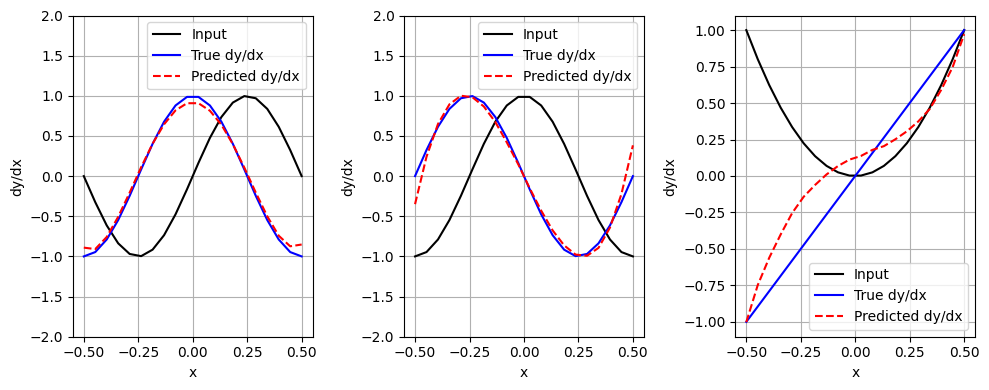

In [35]:
plt.figure(figsize=(10, 4))

new_x = np.linspace(-1/2, 1/2, y.shape[1]).reshape(1,-1)

# test 1
plt.subplot(131)
new_y = np.sin(2*np.pi*new_x)
new_dy = np.cos(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
#plt.xlim(-0.75,0.75)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 2
plt.subplot(132)
new_y = np.cos(2*np.pi*new_x)
new_dy = -np.sin(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 3
plt.subplot(133)
new_y = new_x ** 2
new_dy = 2 * new_x
new_y = new_y / np.max(np.abs(new_y))
new_dy = new_dy / np.max(np.abs(new_dy))
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()